# eda

In [24]:
import pandas as pd

from google.colab import drive
drive.mount("/content/gdrive")

# read in data as pandas dataframe
df = pd.read_csv("/content/gdrive/MyDrive/data/diamonds.csv")

display(df[:4])

Mounted at /content/gdrive


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


## data summary

In [ ]:
print(f"The dataset represents key features for {len(df)} diamonds.")
print(f"shape: {df.shape}")
print(f"features: {', '.join(df.columns[1:])}")
print(df.dtypes)
print(f"cuts: {', '.join(df.cut.unique())}")
print(f"colors: {', '.join(df.color.unique())}")
print(f"clarities: {', '.join(df.clarity.unique())}")
df.describe()

The dataset represents key features for 53940 diamonds.
shape: (53940, 11)
features: carat, cut, color, clarity, depth, table, price, x, y, z
Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object
cuts: Ideal, Premium, Good, Very Good, Fair
colors: E, I, J, H, F, G, D
clarities: SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## data transformation ( tidy )

In [25]:
# gather ( melt ) dataframe
diamonds = pd.melt(
    frame=df,
    value_vars=["x", "y", "z"],
    id_vars=["carat", "cut", "color", "clarity", "depth", "table", "price"],
    var_name="measurement"
    )

display(diamonds[:4])

,carat,cut,color,clarity,depth,table,price,measurement,value
0,0.23,Ideal,E,SI2,61.5,55.0,326,x,3.95
1,0.21,Premium,E,SI1,59.8,61.0,326,x,3.89
2,0.23,Good,E,VS1,56.9,65.0,327,x,4.05
3,0.29,Premium,I,VS2,62.4,58.0,334,x,4.20


## data visualization

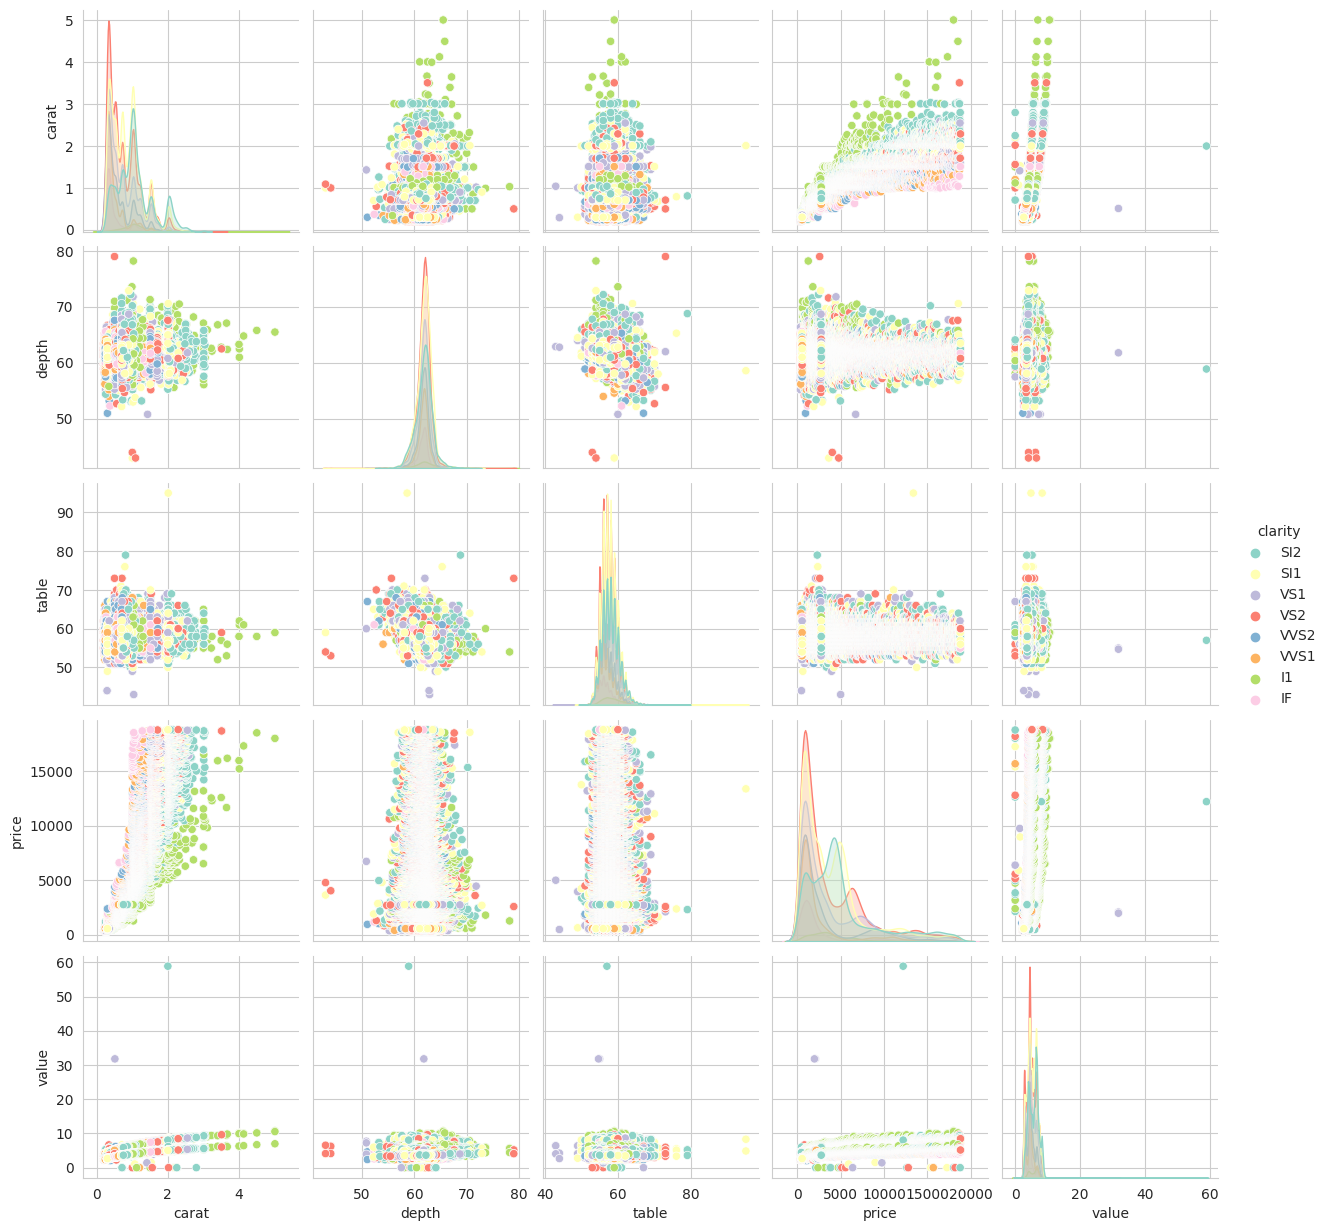

In [ ]:
# pairplot ( slow! 6min )
import seaborn as sns
qualitative_colors = sns.color_palette("Set3", 10)
sns.set_palette(qualitative_colors)
sns.set_style("whitegrid")
sns.pairplot(diamonds, vars=["carat", "depth", "table", "price", "value"], hue="clarity")

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


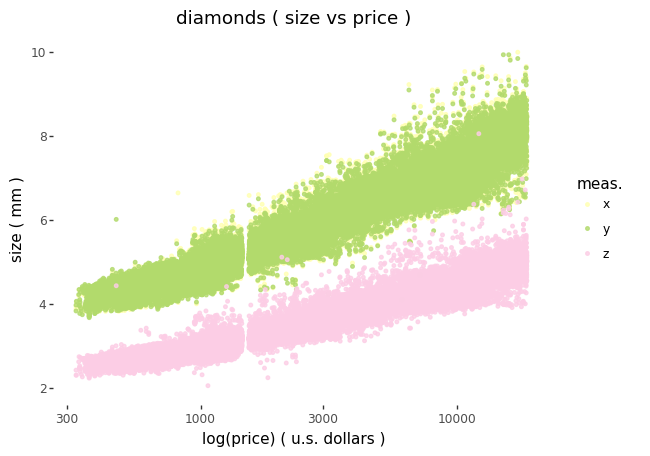

<ggplot: (8753357729934)>

In [ ]:
from plotnine import (
    ggplot,
    aes,
    geom_point
)
from plotnine.qplot import labs
from plotnine.scales.limits import lims
from plotnine.scales.scale_manual import scale_color_manual
from plotnine.themes import theme_set, theme_tufte

theme_set(theme_tufte())

p = (ggplot(diamonds)
    + aes(x="price", y="value", color="measurement")
    + geom_point(size=1, alpha=0.8)
    + scale_x_log10()
    + lims(y=(2, 10))
    + labs(title="diamonds ( size vs price )", x="log(price) ( u.s. dollars )", y="size ( mm )", color="meas.")
    + scale_color_manual(values=["#ffffb3", "#b2da6c", "#fccde5"])
    )
p

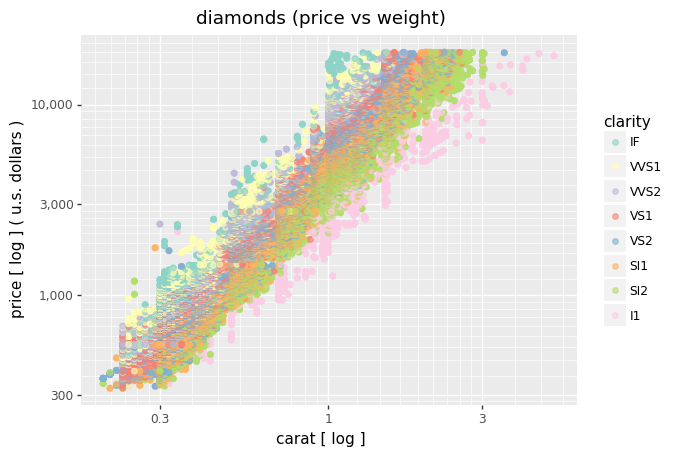

<ggplot: (8727225611081)>

In [99]:
from plotnine.scales.scale_xy import scale_x_log10, scale_y_log10
from plotnine.scales import scale_fill_brewer, scale_color_brewer
from mizani.formatters import comma_format

clarity_list = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]

p = (ggplot(diamonds)
    + aes(x="carat", y="price", color="clarity", fill="clarity")
    + geom_point(size=1.8, alpha=0.6)
    + scale_x_log10()
    + scale_y_log10(labels=comma_format())
    + labs(title="diamonds (price vs weight)", y="price [ log ] ( u.s. dollars )", x="carat [ log ]")
    + scale_fill_brewer(type="qual", palette="Set3", limits=clarity_list)
    + scale_color_brewer(type="qual", palette="Set3", limits=clarity_list)
    )
p

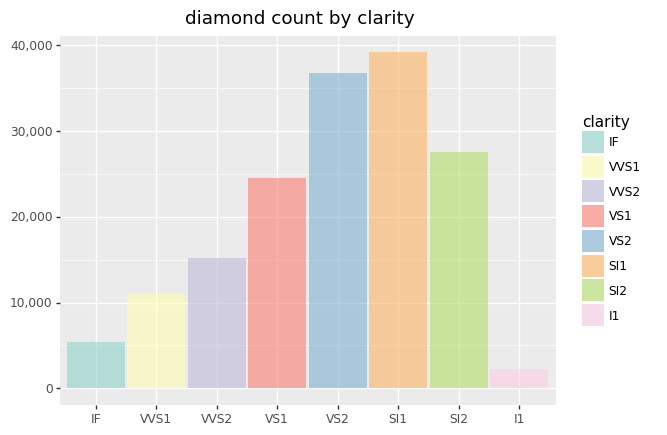

<ggplot: (8727220931419)>

In [28]:
from plotnine import geom_bar
from plotnine.scales import scale_x_discrete
from mizani.formatters import dollar_format

p = (ggplot(diamonds)
    + aes(x="clarity", fill="clarity")
    + geom_bar(alpha=0.6, color="#000", size=0, width=0.96)
    + scale_x_discrete(limits=clarity_list)
    + scale_fill_brewer(type="qual", palette="Set3", limits=clarity_list)
    + labs(title="diamond count by clarity", x="", y="")
    + scale_y_continuous(labels=comma_format())
    )
p

/usr/local/lib/python3.10/dist-packages/plotnine/positions/position.py:202: PlotnineWarning: position_dodge requires non-overlapping x intervals
/usr/local/lib/python3.10/dist-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


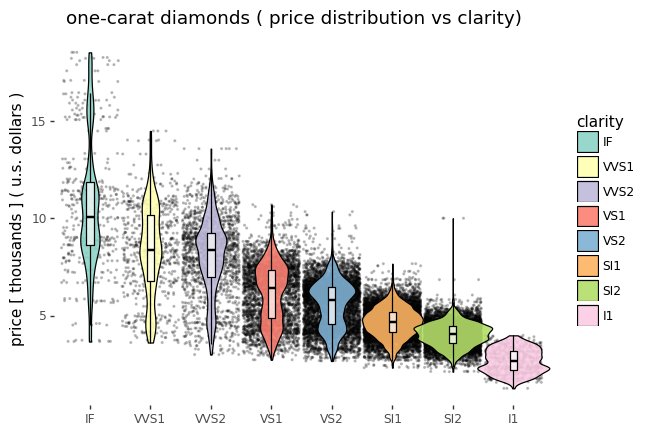

<ggplot: (8753328816014)>

In [ ]:
from plotnine import geom_violin, geom_boxplot, geom_jitter

one_carat_diamonds = diamonds.query("carat >= 0.9 and carat <= 1.1")

p = (ggplot(one_carat_diamonds)
    + aes(x="clarity", y="price / 1e3", fill="clarity")
    + geom_jitter(color="#000000", fill="#000000", size=0.3, alpha=0.2, width=0.47)
    + geom_violin(color="#000", size=0.5, width=1.3, alpha=0.9)
    + geom_boxplot(color="#000", fill="#fff", alpha=0.7, width=0.12, outlier_shape="")
    + scale_x_discrete(limits=clarity_list)
    + scale_fill_brewer(type="qual", palette="Set3", limits=clarity_list)
    + scale_color_brewer(type="qual", palette="Set3", limits=clarity_list)
    + labs(title="one-carat diamonds ( price distribution vs clarity)", x="", y="price [ thousands ] ( u.s. dollars )")
    )
p

## sb dataset

,state,tests
0,California,6746085
1,Other,9821
2,Unknown,734815


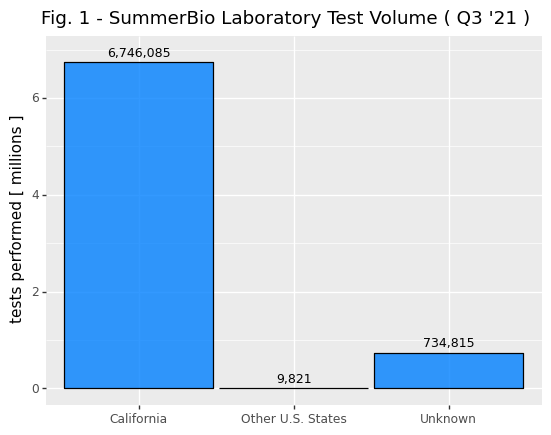

<ggplot: (8727220546398)>

In [82]:
from plotnine import geom_col, geom_text
from plotnine.scales import scale_x_discrete, scale_y_continuous
import numpy as np

sb_states = pd.read_json("/content/gdrive/MyDrive/data/sb.states2022.json")
sb_states.columns = ["state", "tests"]
#display(sb_states[:5])

sb_states["state_collapse"] = np.where(sb_states.tests < 1e5, "Other", sb_states.state)

sb_states_collapsed = sb_states[["state_collapse", "tests"]] \
    .fillna("Unknown") \
    .groupby("state_collapse") \
    .aggregate("sum")

sb_states_collapsed["state"] = sb_states_collapsed.index
sb_states_collapsed.reset_index(drop=True, inplace=True)

display(sb_states_collapsed[["state", "tests"]])

p_summer = (ggplot(sb_states_collapsed)
    + aes(x="state", y="tests / 1e6")
    + geom_col(color="#000", fill="#0080ff", alpha=0.8, width=0.96)
    + labs(title="Fig. 1 - SummerBio Laboratory Test Volume ( Q3 '21 )", x="", y="tests performed [ millions ]")
    + scale_x_discrete(labels=["California", "Other U.S. States", "Unknown"])
    + geom_text(aes(label="[f'{n:,}' for n in tests]"), nudge_y=0.2, size=9)
)
p_summer

## save output

In [ ]:
p.save(filename="/content/gdrive/MyDrive/data/figure_one.png", height=6, width=8, units="in", dpi=300)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /content/gdrive/MyDrive/data/figure_one.png


In [3]:
from plotnine.data import mpg as data
display(data[:8])
data.describe()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


## pair plot

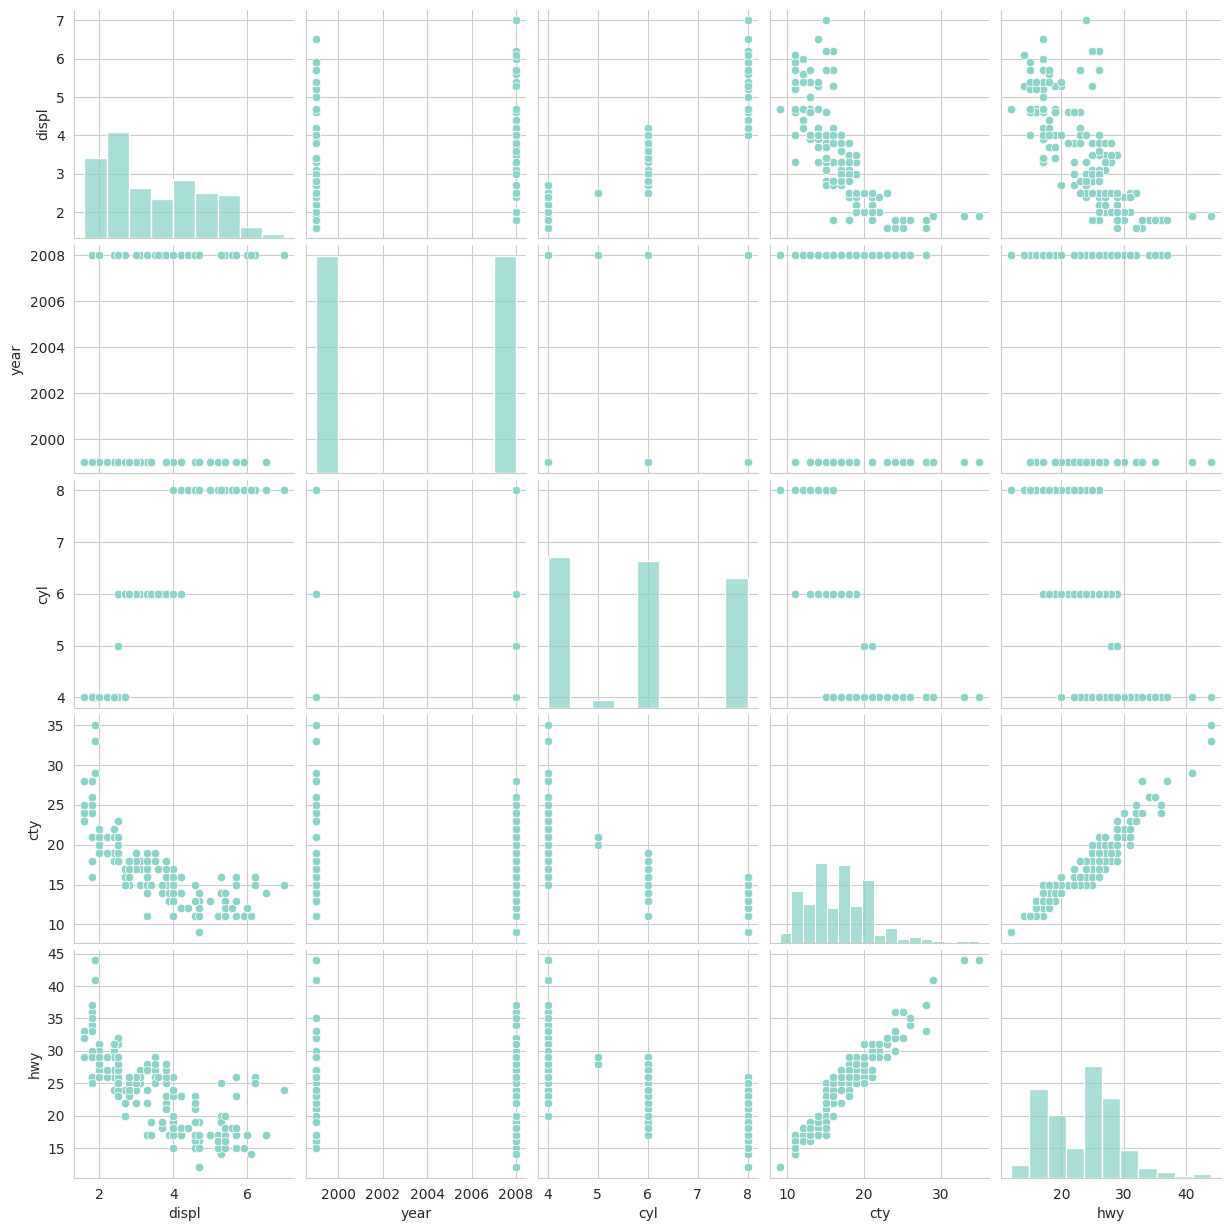

In [ ]:
import seaborn
seaborn.pairplot(data, vars=["displ", "year", "cyl", "cty", "hwy"])

manufacturer    category
model           category
displ            float64
year               int64
cyl             category
trans           category
drv             category
cty                int64
hwy                int64
fl              category
class           category
dtype: object

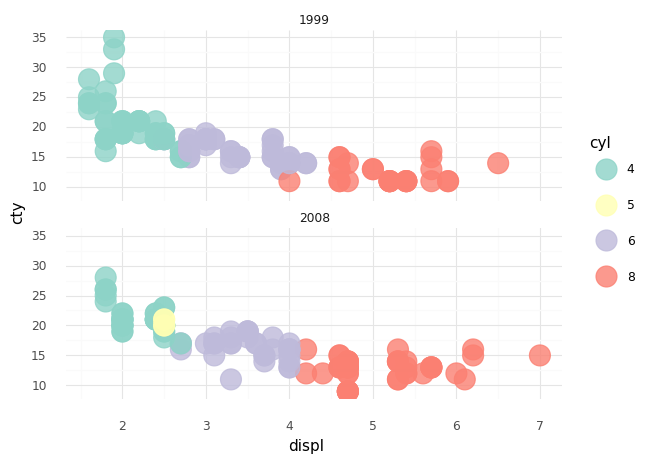

<ggplot: (8727224210754)>

In [21]:
from plotnine import *
from plotnine.themes import theme_minimal as theme
from plotnine.scales import scale_color_brewer, scale_fill_brewer

# convert cylinders column from numeric to categorical
o = data.copy()
o["cyl"] = o["cyl"].astype("category")
display(o.dtypes)

p = (ggplot(o)
    + aes(x="displ", y="cty")
    + geom_point(aes(fill="cyl", color="cyl"), size=8, alpha=0.8)
    + scale_fill_brewer(type="qual", palette="Set3")
    + scale_color_brewer(type="qual", palette="Set3")
    + facet_wrap(facets="year", ncol=1)
    + theme()
)
p